In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# regresion lineal 

dataset obtenido de 
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


In [2]:
from sklearn.linear_model import LinearRegression

## 1 EDA

In [3]:
dataset = pd.read_csv('28_life_expectancy_data.csv')
dataset.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## seleccionar las mejores variables 
escogemos las mejores variables para la RL, un facil analisis es un heatmap y despues con sns.pairplot

<AxesSubplot:>

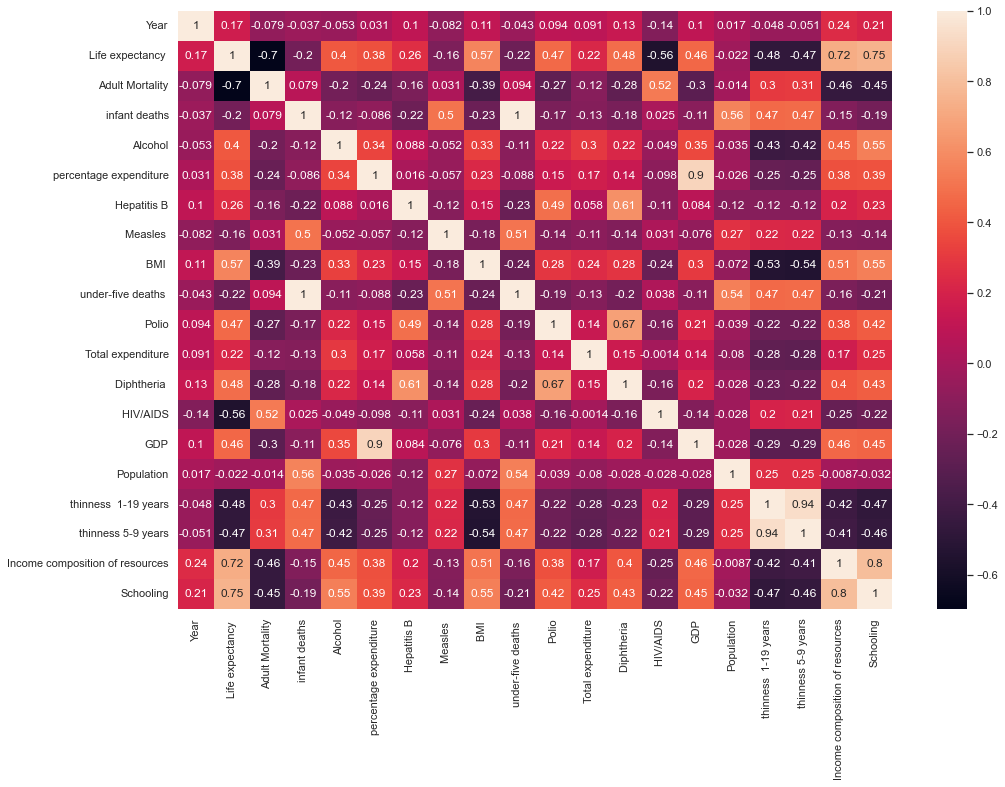

In [9]:
sns.set(rc={'figure.figsize':(16,11)})
sns.heatmap(dataset.corr(), cbar=True, annot=True)

In [22]:
# este codigo nos mostrara en orden la variables que tiene mas relacion respecto a la variable objetivo Life expectancy 
data_cor = dataset.corr()
best_cor = data_cor[data_cor["Life expectancy "] > 0.3]["Life expectancy "].sort_values()
best_cor

percentage expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
 BMI                               0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

In [34]:
# tomamos los nombre de las 4  columnas con mejor correlacion 
cols = list(best_cor.index)[-5:]
# creamos un nuevo dataset solo con esass columnas
ds2 = dataset[cols]

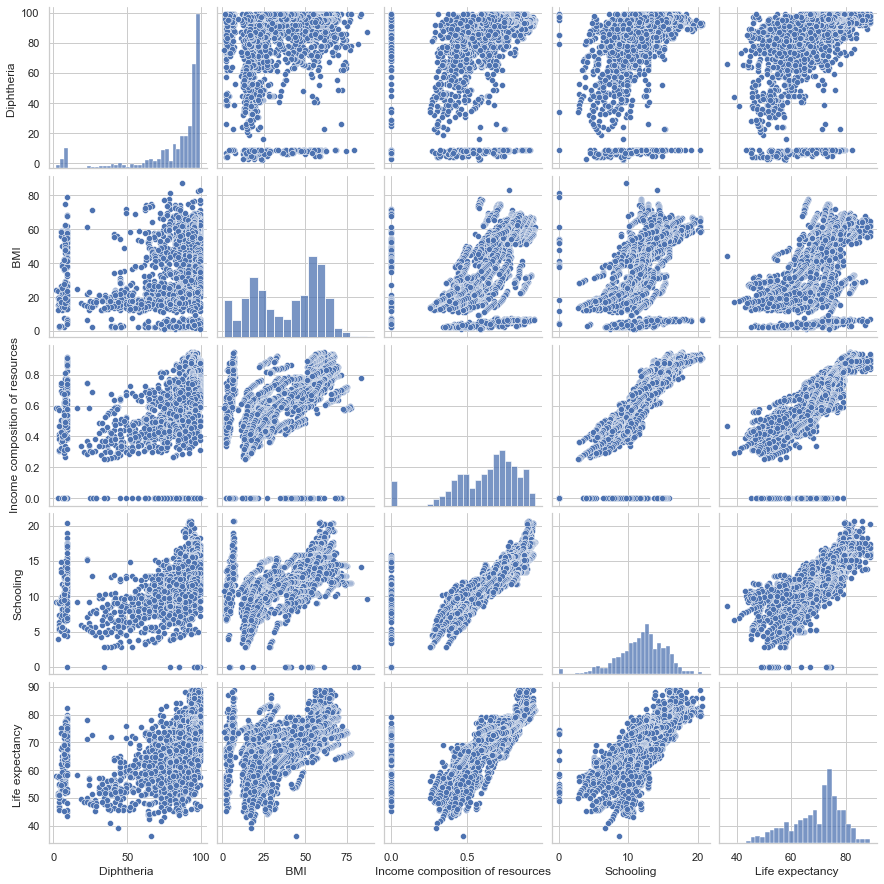

In [35]:
sns.pairplot(ds2, height=2.5)
plt.show()

## limpiar outliers
como vemos en las graficas de distribucion tenemos muchos outliers, que en las graficas de scatter plot generan que hayan 2 grupos 1 de los ouliers y otro de la media de los datos, asiq ue requerimos eliminar los outliers que entorpeceran el modelo. 

In [90]:
# asi eliminamos los outliers de todas las columnas, conbine 2 metodos de este post:
#  https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
q_low = ds2.quantile(0.01) # lo ideal es 0.01 y 0.99
q_hi  = ds2.quantile(0.99)

ds3 = ds2[(ds2 < q_hi).all(axis=1) & (ds2 > q_low).all(axis=1) ] # all(axis=1) especifica que la mascara se aplicara a todas las columnas 

print(ds2.shape, ds3.shape)
ds3.head()

(2938, 5) (2106, 5)


,Diphtheria,BMI,Income composition of resources,Schooling,Life expectancy
0,65.0,19.1,0.479,10.1,65.0
1,62.0,18.6,0.476,10.0,59.9
2,64.0,18.1,0.470,9.9,59.9
3,67.0,17.6,0.463,9.8,59.5
4,68.0,17.2,0.454,9.5,59.2


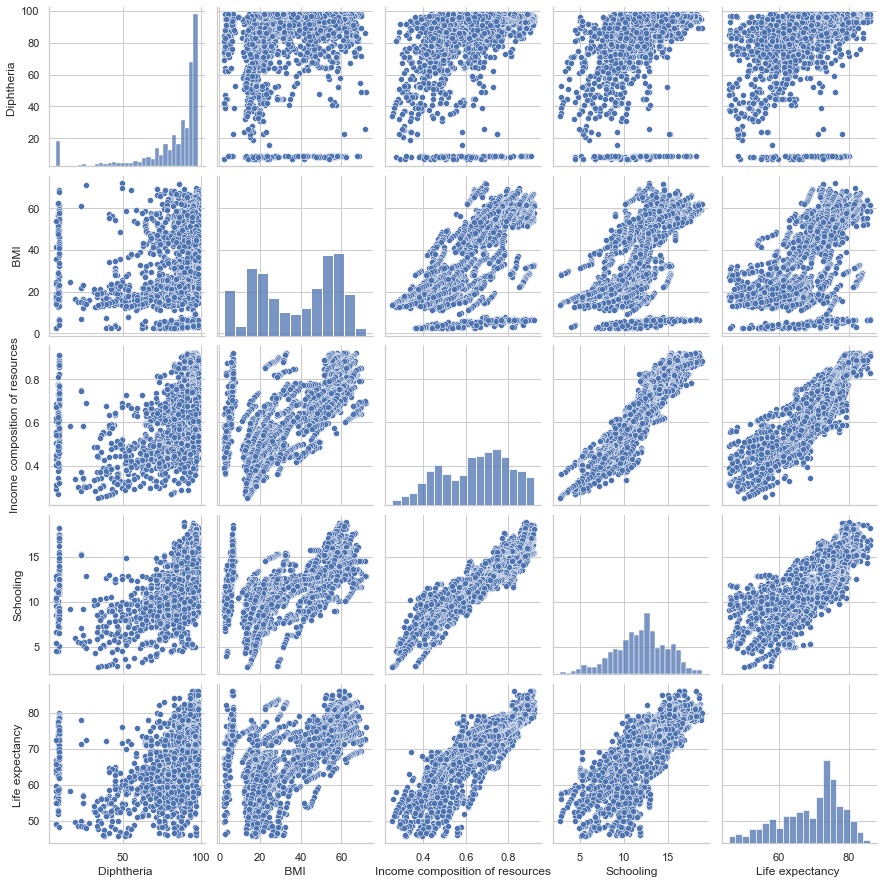

In [47]:
sns.pairplot(ds3, height=2.5)
plt.show()

- como vemos ya quedo limpia las relaciones de life expentancy vs [schooling, income composition], pero aun tenemos problemas de outliers con las columnas de [dipteria, BMI] ambos tienen aun outliers en la parte inferior, esto es debido a que nuestra limpieza se hizo a todas las columnas y aun requiere una limpieza personalizada en esas 2 columnas. 


## 2 modelo 

## creamos las variables x y y
para simular la clase sera un RLS con 1 variable

In [91]:
# solo jalamos los puros datos y ademas los comnvertimos en matriz columna como lo requiere skleran
#ds3 = ds3.sample(30) # simularemos como enla clase de que tenemos  un dataset pequeño con solo 30 muestras
x = ds3.iloc[:, 3].values.reshape(-1, 1) 
y = ds3.iloc[:, -1].values.reshape(-1, 1)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train[:5]

array([[16.8],
       [10.1],
       [13. ],
       [13.3],
       [17.3]])

## entrenamiento 

In [93]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

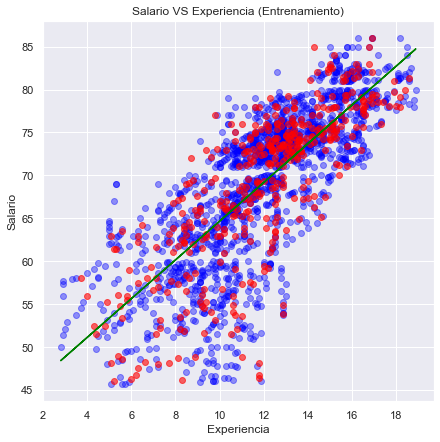

In [94]:
sns.set(rc={'figure.figsize':(7,7)})
viz = plt

# data de trainig
viz.scatter(X_train, Y_train, color = 'blue', alpha= 0.4)
viz.plot(X_train, regressor.predict(X_train), color = 'green')

# data de testing
viz.scatter(X_test, Y_test, color = 'red', alpha= 0.6)

viz.title('Salario VS Experiencia (Entrenamiento)')
viz.xlabel('Experiencia')
viz.ylabel('Salario')
viz.show()

In [95]:
regressor.score(X_test, Y_test)

0.6151885116625315

con 30 muestras teniamos un escore de .6199
con 2106 tenemos .6155

In [ ]:
# intente crear un dataset de clasificacion con el primer dataset 
# dataset[dataset["Status"] == "Developing"]
# dataset["Status_bool"] = dataset["Status"].apply(lambda x: 1 if x == "Developed" else 0)

# regresion logistica 

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [198]:
diabetes = pd.read_csv('28_diabetes.csv')


en este caso a diferencia de la clase no tenemos el target de forma binaria 0 no enfermo, 1 enfermo asi que usaremos el valor del target(grado de avance de la enfermedad) para asignar este valor. 

In [199]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [201]:
logreg = LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [202]:
logreg.score(X_test, y_test)

0.8020833333333334

evaluamos el modelo usando la matriz de confusion y el accuracy

In [203]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

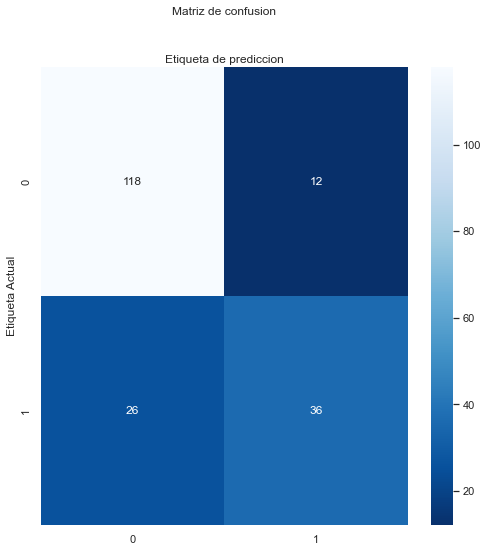

In [209]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")
plt.show()

In [211]:
metrics.accuracy_score(y_test,y_pred)

0.8020833333333334